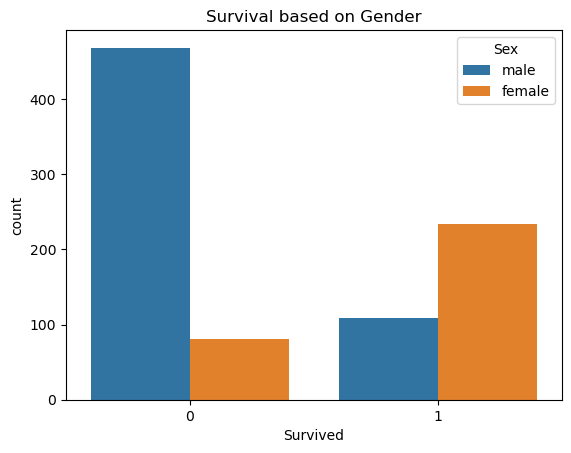

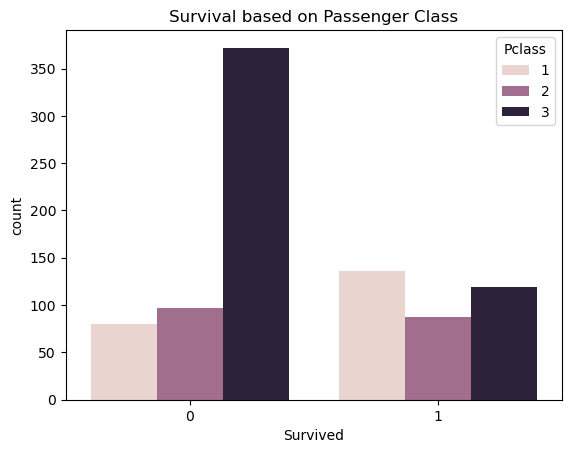

Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



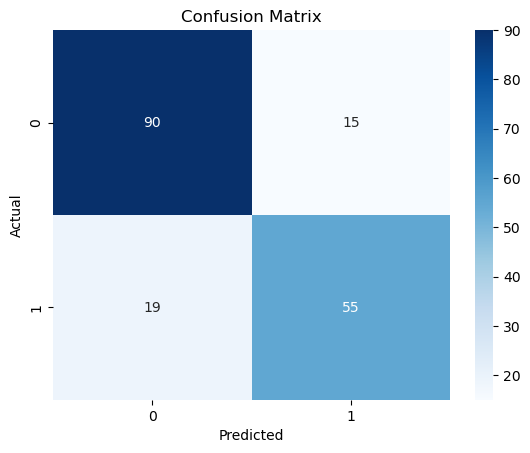

In [3]:

# Titanic Survival Prediction - Logistic Regression

## 1. Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

## 2. Load Dataset
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df.head()

## 3. Exploratory Data Analysis (EDA)
df.isnull().sum()

sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival based on Gender')
plt.show()

sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival based on Passenger Class')
plt.show()

## 4. Data Cleaning
df['Age'] = df['Age'].fillna(df['Age'].median())
df.drop('Cabin', axis=1, inplace=True)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

## 5. Model Training (Logistic Regression)
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## 6. Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

## 7. Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

